In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import roc_curve, auc
from sklearn.utils import shuffle

from interpret.glassbox import ExplainableBoostingClassifier
from interpret import show
from interpret.perf import ROC

#### load data

In [2]:
train_pd = pd.read_csv("~/Documents/Duke/Cynthia Research/KY-analysis-mytrials/broward/data/ada_train.csv")
test_pd = pd.read_csv("~/Documents/Duke/Cynthia Research/KY-analysis-mytrials/broward/data/ada_test.csv")
x_train, y_train = train_pd.values[:, 1:], train_pd.values[:, 0]
x_test, y_test = test_pd.values[:, 1:], test_pd.values[:, 0]

In [3]:
cols= train_pd.columns[1:]

#### histogram

In [4]:
ebm = ExplainableBoostingClassifier(feature_names=cols, n_estimators=40, max_tree_splits=1).fit(x_train, y_train)

In [5]:
ebm.score(x_train, y_train)

0.6577095329494562

In [6]:
ebm.score(x_test, y_test)

0.6353887399463807

In [15]:
ebm_global = ebm.explain_global(name = 'EBM')
show(ebm_global)

#### Cross Validation

In [8]:
combined = np.r_[train_pd, test_pd]
X, Y = combined[:, 1:], combined[:,0]

Text(0,0.5,'True Positive Rate')

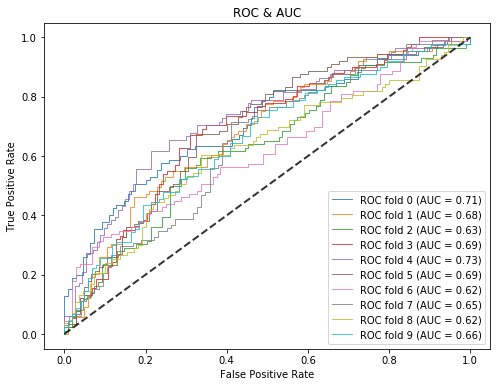

In [10]:
cv = KFold(n_splits=10, random_state=816, shuffle=True)
classifier = ExplainableBoostingClassifier(feature_names=cols, n_estimators=40, max_tree_splits=1)
train_acc = []
test_acc = []

i = 0
plt.figure(figsize=(8,6))
for train, test in cv.split(X, Y):
    X_train, Y_train = X[train], Y[train]
    X_test, Y_test = X[test], Y[test]
    
    model = classifier.fit(X_train, Y_train)
    test_prob = model.predict_proba(X_test)[:,1]
    
    train_acc.append(model.score(X_train, Y_train))
    test_acc.append(model.score(X_test, Y_test))
    
    ## compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(Y_test, test_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, alpha=0.8, 
             label = 'ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1

plt.plot([0, 1], [0, 1], lw=2, linestyle = '--',color='black',alpha=.8)
plt.title("ROC & AUC")
plt.legend(loc = "lower right")
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [11]:
train_acc

[0.6475315729047072,
 0.6572904707233066,
 0.6515499425947188,
 0.6521239954075775,
 0.6486796785304249,
 0.6636050516647531,
 0.6603557085484796,
 0.6580608146873207,
 0.6586345381526104,
 0.6643717728055077]

In [12]:
np.mean(train_acc)

0.6562203546019407

In [13]:
test_acc

[0.6804123711340206,
 0.6082474226804123,
 0.6185567010309279,
 0.6082474226804123,
 0.6958762886597938,
 0.6237113402061856,
 0.5854922279792746,
 0.5492227979274611,
 0.6217616580310881,
 0.6217616580310881]

In [14]:
np.mean(test_acc)

0.6213289888360665